In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import scipy.ndimage as ndimage
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('rental_data.csv', sep=',')

In [4]:
month = data['Month']
year = data['Year']
postcode = data['Postcode']
n = data['# of Bonds']

month[month == 'January'] = 1
month[month == 'February'] = 2
month[month == 'March'] = 3
month[month == 'April'] = 4
month[month == 'May'] = 5
month[month == 'June'] = 6
month[month == 'July'] = 7
month[month == 'August'] = 8
month[month == 'September'] = 9
month[month == 'October'] = 10
month[month == 'November'] = 11
month[month == 'December'] = 12

month[year == 2019]=month[year == 2019]+12
month[year == 2020]=month[year == 2020]+24
month[year == 2021]=month[year == 2021]+36

data = pd.read_csv('Distance.csv')
postcode_list = []
for x in data['data']:
    postcode_list = np.append(postcode_list, x[0:4])
    
data = pd.read_csv('Distance.csv',delimiter='(')
distance_list = []
for x in data['data']:
    distance_list = np.append(distance_list, x[0:-4])

distance = []
for i in postcode:
    distance = np.append(distance,np.median(distance_list[postcode_list == str(i)].astype(np.float)))
    
bins = np.linspace(0,29,30)
median_values = np.empty([np.max(month),len(bins)])
for i in range(0,43):
    for j in range(0,30):
        median_values[i,j] = np.median(n[(month == i+1) & (distance > j) & (distance < j+1)])
        

for j in range(0,30):
    median_values[:,j] = ndimage.uniform_filter1d(median_values[:,j], size=12)
        
    

Text(0, 0.5, '% Change')

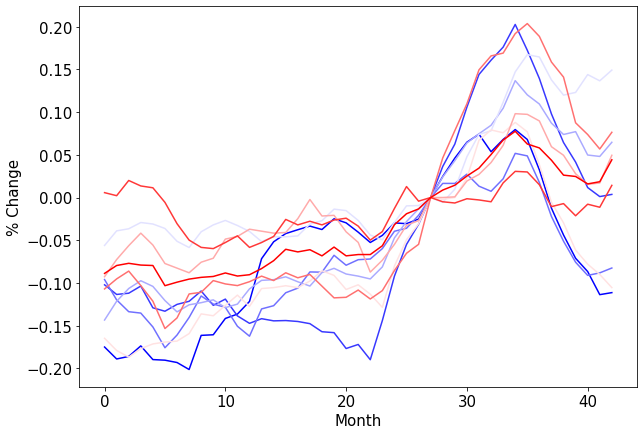

In [5]:
zero_point = 27
distance = 10
colors = plt.cm.bwr(np.linspace(0,1,distance))
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 15})

for i in range(0,distance):
    plt.plot((median_values[:,i]-median_values[zero_point,i])/median_values[zero_point,i],color=colors[i])
    
plt.xlabel('Month')
plt.ylabel('% Change')

#plt.plot((median_values[:,0]-median_values[zero_point,0])/median_values[zero_point,0],'b-')
#plt.plot((median_values[:,distance]-median_values[zero_point,distance])/median_values[zero_point,distance],'k-')